In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [28]:
data = pd.read_csv("final_website_stats.csv")
print('data loaded')

data loaded


# 🧪 Hypothesis Testing on Ad Spend Data

## 📁 Project Overview

In this project, we analyze a dataset containing online advertisement spending data across different dates. Our objective is to understand **whether ad spending patterns differ significantly between weekends and weekdays**. This hypothesis test offers insights into user behavior and can guide more effective budget allocations for marketing strategies.

---

## 📊 Dataset Description

| Column Name     | Description                                 |
|-----------------|---------------------------------------------|
| `timestamp`     | Date of the data record                     |
| `page_views`    | Number of page views on that day            |
| `ad_spend`      | Amount spent on ads on that day             |
| `is_weekend`    | Boolean indicating if the day is a weekend  |
| `day_of_week`   | Name of the day (e.g., Monday, Tuesday)     |
| `is_holiday`    | Boolean indicating if the day is a holiday  |


---

## ❓ Hypothesis Testing Problem

## **Research Question:**
> Is there a statistically significant difference in ad spend between weekends and weekdays?

---



In [29]:
display(data.head())

,Unnamed: 0,timestamp,page_views,ad_spend,is_weekend,day_of_week,is_holiday
0,0,2022-01-01,1165.962767,194.901425,True,Saturday,True
1,1,2022-01-02,1191.485835,175.852071,True,Sunday,False
2,2,2022-01-03,1266.928269,269.430656,False,Monday,False
3,3,2022-01-04,1364.193858,295.690896,False,Tuesday,False
4,4,2022-01-05,1013.282520,242.975399,False,Wednesday,False


In [30]:
data.isnull().sum()

Unnamed: 0     0
timestamp      0
page_views     0
ad_spend       0
is_weekend     0
day_of_week    0
is_holiday     0
dtype: int64

In [31]:
data = data.drop(columns=['Unnamed: 0'])

In [32]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
display(data.head())

,timestamp,page_views,ad_spend,is_weekend,day_of_week,is_holiday
0,2022-01-01,1165.962767,194.901425,True,Saturday,True
1,2022-01-02,1191.485835,175.852071,True,Sunday,False
2,2022-01-03,1266.928269,269.430656,False,Monday,False
3,2022-01-04,1364.193858,295.690896,False,Tuesday,False
4,2022-01-05,1013.282520,242.975399,False,Wednesday,False


In [33]:
# Create a new column for conversion rate (assuming conversion rate is page_views / ad_spend)
data['conversion_rate'] = data['page_views'] / data['ad_spend']
display(data.head())

,timestamp,page_views,ad_spend,is_weekend,day_of_week,is_holiday,conversion_rate
0,2022-01-01,1165.962767,194.901425,True,Saturday,True,5.982320
1,2022-01-02,1191.485835,175.852071,True,Sunday,False,6.775501
2,2022-01-03,1266.928269,269.430656,False,Monday,False,4.702242
3,2022-01-04,1364.193858,295.690896,False,Tuesday,False,4.613581
4,2022-01-05,1013.282520,242.975399,False,Wednesday,False,4.170309


In [42]:
# Segment the data into holiday and non-holiday periods
holiday_data = data[data['is_holiday'] == True]
non_holiday_data = data[data['is_holiday'] == False]

print("Holiday Data \n")
display(holiday_data.head())

print("Non- Holiday Data \n")
display(non_holiday_data.head())

Holiday Data 



,timestamp,page_views,ad_spend,is_weekend,day_of_week,is_holiday,conversion_rate
0,2022-01-01,1165.962767,194.901425,True,Saturday,True,5.982320
184,2022-07-04,1492.490415,393.296116,False,Monday,True,3.794826
331,2022-11-28,1671.390338,373.082369,False,Monday,True,4.479950
358,2022-12-25,1491.410599,339.681557,True,Sunday,True,4.390614
365,2023-01-01,1522.292648,317.963386,True,Sunday,True,4.787635


Non- Holiday Data 



,timestamp,page_views,ad_spend,is_weekend,day_of_week,is_holiday,conversion_rate
1,2022-01-02,1191.485835,175.852071,True,Sunday,False,6.775501
2,2022-01-03,1266.928269,269.430656,False,Monday,False,4.702242
3,2022-01-04,1364.193858,295.690896,False,Tuesday,False,4.613581
4,2022-01-05,1013.282520,242.975399,False,Wednesday,False,4.170309
5,2022-01-06,996.316889,242.975891,False,Thursday,False,4.100476


In [35]:
# Descriptive statistics for ad spend and conversion rates
holiday_stats = holiday_data[['ad_spend', 'conversion_rate']].describe()
non_holiday_stats = non_holiday_data[['ad_spend', 'conversion_rate']].describe()

print("Holiday Data Statistics:")
print(holiday_stats)

print("\nNon-Holiday Data Statistics:")
print(non_holiday_stats)

Holiday Data Statistics:
         ad_spend  conversion_rate
count   12.000000        12.000000
mean   397.914019         4.233408
std    103.955058         0.820185
min    194.901425         2.641002
25%    364.732166         3.971483
50%    393.702810         4.404208
75%    411.852465         4.484089
max    625.410942         5.982320

Non-Holiday Data Statistics:
          ad_spend  conversion_rate
count  1084.000000      1084.000000
mean    247.875711         6.710801
std      70.990996         2.155366
min     113.665941         1.782064
25%     206.264289         5.198349
50%     240.194715         6.431822
75%     269.362090         7.902812
max     679.515529        15.143508


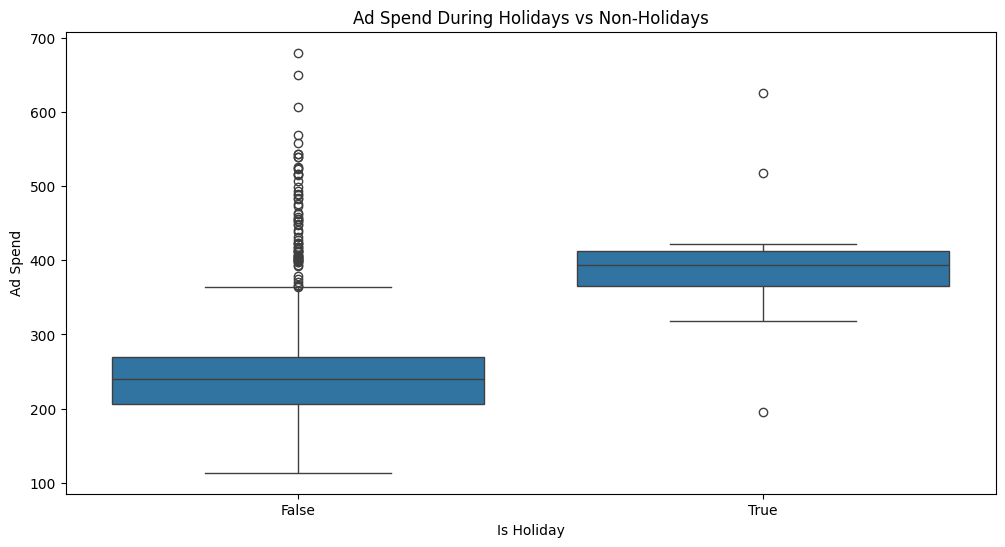

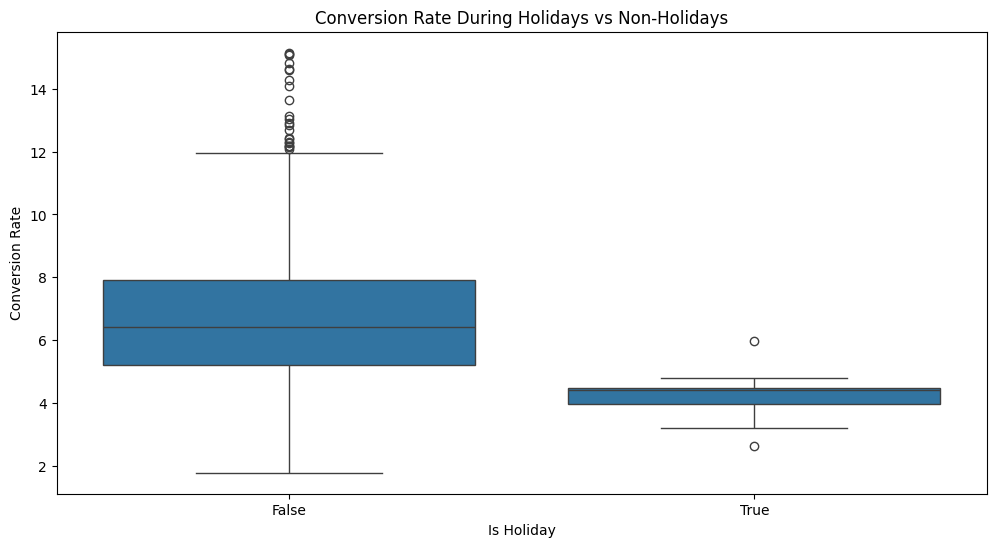

In [36]:
# Box plots for ad spend
plt.figure(figsize=(12, 6))
sns.boxplot(x='is_holiday', y='ad_spend', data=data)
plt.title('Ad Spend During Holidays vs Non-Holidays')
plt.xlabel('Is Holiday')
plt.ylabel('Ad Spend')
plt.show()

# Box plots for conversion rates
plt.figure(figsize=(12, 6))
sns.boxplot(x='is_holiday', y='conversion_rate', data=data)
plt.title('Conversion Rate During Holidays vs Non-Holidays')
plt.xlabel('Is Holiday')
plt.ylabel('Conversion Rate')
plt.show()

# Hypothesis Testing

## Normality Test

$H_{0}$: The data is normally distributed.

$H_{1}$: The data is not normally distributed.

In [37]:
def check_normality(group_name, data):
    stat, p_value = stats.shapiro(data)
    print(f"{group_name}: p-value = {p_value:.4f}")
    if p_value < 0.05:
        print("❌ Reject null hypothesis >> Data is NOT normally distributed.\n")
    else:
        print("✅ Fail to reject null hypothesis >> Data is normally distributed.\n")

# Check normality of conversion rates
check_normality("Holiday Data", holiday_data['conversion_rate'])
check_normality("Non-Holiday Data", non_holiday_data['conversion_rate'])

Holiday Data: p-value = 0.3177
✅ Fail to reject null hypothesis >> Data is normally distributed.

Non-Holiday Data: p-value = 0.0000
❌ Reject null hypothesis >> Data is NOT normally distributed.



## Variance Homogeneity Test


In [38]:
def check_variance_homogeneity(*groups):
    test_stat_var, p_value_var = stats.levene(*groups)
    print("p value:%.4f" % p_value_var)
    
    if p_value_var < 0.05:
        print("❌ Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("✅ Fail to reject null hypothesis >> The variances of the samples are same.")

# Check variance homogeneity
check_variance_homogeneity(holiday_data['conversion_rate'], non_holiday_data['conversion_rate'])

p value:0.0062
❌ Reject null hypothesis >> The variances of the samples are different.


Here, we can see that the data for the non-holiday period is not normally distributed, and the variances of the conversion rates between the holiday and non-holiday periods are different. This means that the assumptions for a t-test are not met, and we should use a non-parametric test instead.

## Non-Parametric Test
Since the data does not meet the assumptions of a t-test, we will use the Mann-Whitney U test, which is a non-parametric alternative to the t-test. The Mann-Whitney U test is used to determine if there is a statistically significant difference between the medians of two independent groups.

In [39]:
# Mann-Whitney U test
u_stat, p_value = stats.mannwhitneyu(holiday_data['conversion_rate'], non_holiday_data['conversion_rate'], alternative='two-sided')

print(f"U-Statistic: {u_stat}")
print(f"P-Value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("There is a statistically significant difference in conversion rates between holidays and non-holidays.")
else:
    print("There is no statistically significant difference in conversion rates between holidays and non-holidays.")

U-Statistic: 1568.0
P-Value: 6.0114574108177335e-06
There is a statistically significant difference in conversion rates between holidays and non-holidays.


In [40]:
# Descriptive statistics for ad spend and conversion rates
holiday_stats = holiday_data[['ad_spend', 'conversion_rate']].describe()
non_holiday_stats = non_holiday_data[['ad_spend', 'conversion_rate']].describe()

print("Holiday Data Statistics:")
print(holiday_stats)

print("\nNon-Holiday Data Statistics:")
print(non_holiday_stats)

Holiday Data Statistics:
         ad_spend  conversion_rate
count   12.000000        12.000000
mean   397.914019         4.233408
std    103.955058         0.820185
min    194.901425         2.641002
25%    364.732166         3.971483
50%    393.702810         4.404208
75%    411.852465         4.484089
max    625.410942         5.982320

Non-Holiday Data Statistics:
          ad_spend  conversion_rate
count  1084.000000      1084.000000
mean    247.875711         6.710801
std      70.990996         2.155366
min     113.665941         1.782064
25%     206.264289         5.198349
50%     240.194715         6.431822
75%     269.362090         7.902812
max     679.515529        15.143508


## Correlation Analysis

In [41]:
# Correlation between ad spend and conversion rate during holidays
holiday_corr = holiday_data['ad_spend'].corr(holiday_data['conversion_rate'])
print(f"Correlation between ad spend and conversion rate during holidays: {holiday_corr}")

# Correlation between ad spend and conversion rate during non-holidays
non_holiday_corr = non_holiday_data['ad_spend'].corr(non_holiday_data['conversion_rate'])
print(f"Correlation between ad spend and conversion rate during non-holidays: {non_holiday_corr}")

Correlation between ad spend and conversion rate during holidays: -0.951443656756273
Correlation between ad spend and conversion rate during non-holidays: -0.7253153342473745


## Correlation Analysis Summary

**Holiday Data:**

* Correlation between ad spend and conversion rate: -0.951

    * This strong negative correlation suggests that as ad spend increases during holidays, the conversion rate tends to decrease.

**Non-Holiday Data:**

* Correlation between ad spend and conversion rate: -0.725

    * This moderate negative correlation suggests that as ad spend increases during non-holidays, the conversion rate also tends to decrease, but not as strongly as during holidays.



## Conclusion and Recommendations
### Summary:
1. During holidays, the average ad spend is higher (mean: 397.91) compared to non-holidays (mean: 247.88).
2. During holidays, the average conversion rate is lower (mean: 4.23) compared to non-holidays (mean: 6.71).
3. From the Mann-Whitney U test results, we can conclude there is a statistically significant difference in conversion rates between holidays and non-holidays (p-value: 6.011e-06).
4. The correlation between ad spend and conversion rate during holidays is -0.951, indicating a strong negative relationship.
5. The correlation between ad spend and conversion rate during non-holidays is -0.725, indicating a moderate negative relationship.

### Recommendations:
So, we should optimize ad spend during holidays to balance higher ad spend if we want to improve coversation rates. Additionally, a healthy budget should be set for non-holiday weeks, as this period tends to bring higher conversion rates compared to holiday weeks.